<a href="https://colab.research.google.com/github/sahilbaishya/HandsOnML/blob/main/Training_Deep_Neural_Networks_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Xavier Garlot and He Initialization

In [32]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

# Nonsaturating Activation Functions

In [33]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [34]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

## Neural Network on Fashion MNIST with Leaky Relu

In [35]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [36]:
X_train_full = X_train_full/255.0
X_test = X_test/255.0

In [37]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [38]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [39]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [40]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.2999 - accuracy: 0.6016 - val_loss: 0.8913 - val_accuracy: 0.7154
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8033 - accuracy: 0.7385 - val_loss: 0.7199 - val_accuracy: 0.7620
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6889 - accuracy: 0.7735 - val_loss: 0.6476 - val_accuracy: 0.7870
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6271 - accuracy: 0.7944 - val_loss: 0.5936 - val_accuracy: 0.8018
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5872 - accuracy: 0.8055 - val_loss: 0.5607 - val_accuracy: 0.8148
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5588 - accuracy: 0.8133 - val_loss: 0.5369 - val_accuracy: 0.8236
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5375 - accuracy: 0.8210 - val_loss: 0.5173 - val_accuracy:

## Using PReLU

In [41]:
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, kernel_initializer = 'he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer = 'he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation= 'softmax')

])

In [42]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = keras.optimizers.SGD(learning_rate = 1e-3),
              metrics = ['accuracy'])

In [43]:
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.2978 - accuracy: 0.6250 - val_loss: 0.8651 - val_accuracy: 0.7386
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7834 - accuracy: 0.7534 - val_loss: 0.6973 - val_accuracy: 0.7804
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6737 - accuracy: 0.7832 - val_loss: 0.6325 - val_accuracy: 0.7986
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6163 - accuracy: 0.8000 - val_loss: 0.5817 - val_accuracy: 0.8120
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5791 - accuracy: 0.8103 - val_loss: 0.5509 - val_accuracy: 0.8246
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5521 - accuracy: 0.8170 - val_loss: 0.5279 - val_accuracy: 0.8316
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5315 - accuracy: 0.8216 - val_loss: 0.5087 - val_accuracy:

## Using SELU

In [44]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(300, activation = 'selu', kernel_initializer = 'lecun_normal'))
for i in range (99):
  model.add(tf.keras.layers.Dense(100, activation = 'selu', kernel_initializer = 'lecun_normal'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [45]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [46]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [47]:
history = model.fit(X_train_scaled, y_train, epochs = 10, validation_data = (X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 57s 26ms/step - loss: 1.0587 - accuracy: 0.5917 - val_loss: 1.0038 - val_accuracy: 0.6306
Epoch 2/10
1719/1719 [==============================] - 43s 25ms/step - loss: 0.7094 - accuracy: 0.7447 - val_loss: 0.5783 - val_accuracy: 0.8034
Epoch 3/10
1719/1719 [==============================] - 44s 25ms/step - loss: 0.5684 - accuracy: 0.8011 - val_loss: 0.5520 - val_accuracy: 0.8144
Epoch 4/10
1719/1719 [==============================] - 43s 25ms/step - loss: 0.5032 - accuracy: 0.8231 - val_loss: 0.4778 - val_accuracy: 0.8398
Epoch 5/10
1719/1719 [==============================] - 43s 25ms/step - loss: 0.4725 - accuracy: 0.8343 - val_loss: 0.4986 - val_accuracy: 0.8306
Epoch 6/10
1719/1719 [==============================] - 44s 25ms/step - loss: 0.4475 - accuracy: 0.8431 - val_loss: 0.4224 - val_accuracy: 0.8536
Epoch 7/10
1719/1719 [==============================] - 44s 26ms/step - loss: 0.4186 - accuracy: 0.8517 - val_loss: 0.4363 -

## Using ReLU

In [48]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = [28, 28]))
model.add(tf.keras.layers.Dense(300, activation = 'relu', kernel_initializer='he_normal'))
for i in range (99):
  model.add(tf.keras.layers.Dense(100, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [49]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [50]:
history = model.fit(X_train_scaled, y_train, epochs = 10, validation_data = (X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 57s 25ms/step - loss: 2.0212 - accuracy: 0.1931 - val_loss: 1.5568 - val_accuracy: 0.3320
Epoch 2/10
1719/1719 [==============================] - 44s 25ms/step - loss: 1.4090 - accuracy: 0.3769 - val_loss: 1.2495 - val_accuracy: 0.4192
Epoch 3/10
1719/1719 [==============================] - 44s 26ms/step - loss: 1.0468 - accuracy: 0.5532 - val_loss: 0.9908 - val_accuracy: 0.5914
Epoch 4/10
1719/1719 [==============================] - 42s 25ms/step - loss: 1.1032 - accuracy: 0.5462 - val_loss: 0.9324 - val_accuracy: 0.5848
Epoch 5/10
1719/1719 [==============================] - 43s 25ms/step - loss: 0.8637 - accuracy: 0.6582 - val_loss: 0.7705 - val_accuracy: 0.7138
Epoch 6/10
1719/1719 [==============================] - 44s 25ms/step - loss: 0.7765 - accuracy: 0.7062 - val_loss: 0.7151 - val_accuracy: 0.7376
Epoch 7/10
1719/1719 [==============================] - 43s 25ms/step - loss: 0.7486 - accuracy: 0.7204 - val_loss: 0.7173 -

# Batch Normalization

In [51]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [52]:
X_train_full = X_train_full/255.0
X_test = X_test/255.0

In [53]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [54]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [55]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_225 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_226 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)            

In [56]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [57]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3),
    metrics = ['accuracy']
)

In [58]:
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 0.8436 - accuracy: 0.7178 - val_loss: 0.5563 - val_accuracy: 0.8094
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5745 - accuracy: 0.8006 - val_loss: 0.4787 - val_accuracy: 0.8394
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5187 - accuracy: 0.8180 - val_loss: 0.4451 - val_accuracy: 0.8512
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4809 - accuracy: 0.8329 - val_loss: 0.4225 - val_accuracy: 0.8572
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4564 - accuracy: 0.8383 - val_loss: 0.4064 - val_accuracy: 0.8598
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4396 - accuracy: 0.8455 - val_loss: 0.3938 - val_accuracy: 0.8624
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4257 - accuracy: 0.8511 - val_loss: 0.3824 - val_accurac

## Applying Batch Normalization Before Activation

In [59]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])


In [60]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])


In [61]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))


Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 1.0297 - accuracy: 0.6733 - val_loss: 0.6632 - val_accuracy: 0.7944
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6681 - accuracy: 0.7831 - val_loss: 0.5468 - val_accuracy: 0.8232
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5863 - accuracy: 0.8067 - val_loss: 0.4936 - val_accuracy: 0.8374
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5368 - accuracy: 0.8211 - val_loss: 0.4634 - val_accuracy: 0.8452
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5041 - accuracy: 0.8298 - val_loss: 0.4418 - val_accuracy: 0.8510
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4819 - accuracy: 0.8347 - val_loss: 0.4254 - val_accuracy: 0.8560
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4657 - accuracy: 0.8399 - val_loss: 0.4126 - val_accurac

# Gradient Clipping

In [62]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [63]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

# Reusing Pretrained Layers

In [64]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [65]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [66]:
X_train_A.shape

(43986, 28, 28)

In [67]:
X_train_B.shape

(200, 28, 28)

In [68]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [69]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [70]:
tf.random.set_seed(42)
np.random.seed(42)

In [71]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [72]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [73]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 7s 4ms/step - loss: 0.5768 - accuracy: 0.8138 - val_loss: 0.3850 - val_accuracy: 0.8637
Epoch 2/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.3535 - accuracy: 0.8806 - val_loss: 0.3235 - val_accuracy: 0.8886
Epoch 3/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.3159 - accuracy: 0.8912 - val_loss: 0.2960 - val_accuracy: 0.9016
Epoch 4/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2963 - accuracy: 0.8986 - val_loss: 0.2845 - val_accuracy: 0.9018
Epoch 5/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2833 - accuracy: 0.9032 - val_loss: 0.2727 - val_accuracy: 0.9083
Epoch 6/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2737 - accuracy: 0.9061 - val_loss: 0.2684 - val_accuracy: 0.9088
Epoch 7/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2653 - accuracy: 0.9096 - val_loss: 0.2711 - val_accuracy:

In [74]:
model_A.save("my_model_A.h5")

In [75]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [76]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [77]:
model_B.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_237 (Dense)           (None, 300)               235500    
                                                                 
 dense_238 (Dense)           (None, 100)               30100     
                                                                 
 dense_239 (Dense)           (None, 50)                5050      
                                                                 
 dense_240 (Dense)           (None, 50)                2550      
                                                                 
 dense_241 (Dense)           (None, 50)                2550      
                                                                 
 dense_242 (Dense)           (None, 1)               

In [78]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 59ms/step - loss: 0.6692 - accuracy: 0.6450 - val_loss: 0.5916 - val_accuracy: 0.7049
Epoch 2/20
7/7 [==============================] - 0s 31ms/step - loss: 0.5149 - accuracy: 0.7600 - val_loss: 0.4735 - val_accuracy: 0.8012
Epoch 3/20
7/7 [==============================] - 0s 20ms/step - loss: 0.4050 - accuracy: 0.8500 - val_loss: 0.3912 - val_accuracy: 0.8641
Epoch 4/20
7/7 [==============================] - 0s 17ms/step - loss: 0.3289 - accuracy: 0.9350 - val_loss: 0.3339 - val_accuracy: 0.9016
Epoch 5/20
7/7 [==============================] - 0s 18ms/step - loss: 0.2770 - accuracy: 0.9450 - val_loss: 0.2908 - val_accuracy: 0.9270
Epoch 6/20
7/7 [==============================] - 0s 31ms/step - loss: 0.2374 - accuracy: 0.9700 - val_loss: 0.2575 - val_accuracy: 0.9412
Epoch 7/20
7/7 [==============================] - 0s 20ms/step - loss: 0.2075 - accuracy: 0.9800 - val_loss: 0.2332 - val_accuracy: 0.9493
Epoch 8/20
7/7 [===========

In [79]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [80]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [81]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [82]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 43ms/step - loss: 0.4038 - accuracy: 0.8150 - val_loss: 0.4046 - val_accuracy: 0.7799
Epoch 2/4
7/7 [==============================] - 0s 17ms/step - loss: 0.3821 - accuracy: 0.8250 - val_loss: 0.3851 - val_accuracy: 0.7951
Epoch 3/4
7/7 [==============================] - 0s 17ms/step - loss: 0.3633 - accuracy: 0.8300 - val_loss: 0.3667 - val_accuracy: 0.8073
Epoch 4/4
7/7 [==============================] - 0s 17ms/step - loss: 0.3455 - accuracy: 0.8500 - val_loss: 0.3484 - val_accuracy: 0.8185
Epoch 1/16
7/7 [==============================] - 1s 42ms/step - loss: 0.2343 - accuracy: 0.9350 - val_loss: 0.1687 - val_accuracy: 0.9817
Epoch 2/16
7/7 [==============================] - 0s 18ms/step - loss: 0.1344 - accuracy: 0.9950 - val_loss: 0.1348 - val_accuracy: 0.9858
Epoch 3/16
7/7 [==============================] - 0s 33ms/step - loss: 0.1089 - accuracy: 0.9950 - val_loss: 0.1177 - val_accuracy: 0.9858
Epoch 4/16
7/7 [===============

In [83]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.0980 - accuracy: 0.9840


[0.09797828644514084, 0.984000027179718]

In [84]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9935


[0.049814410507678986, 0.9934999942779541]

In [85]:
(100 - 98)/(100 - 98.25)

1.1428571428571428

# Faster Optimizers

## Momentum Optimization

In [86]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3, momentum = 0.9)

## Nesterov Optimization

In [87]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3, momentum = 0.9, nesterov = True)

## Adagrad

In [88]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate = 1e-3)

## RMSProp

In [89]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3, rho = 0.9)

## Adam

In [90]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3, beta_1 = 0.9, beta_2 = 0.999)

## Adamax

In [91]:
optimizer = tf.keras.optimizers.Adamax(learning_rate = 1e-3, beta_1 = 0.9, beta_2 = 0.999 )

## Nadam

In [92]:
optimizer = tf.keras.optimizers.Nadam(learning_rate = 1e-3, beta_1=0.9, beta_2 = 0.999)

## Learning Rate Scheduling

In [93]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [94]:
X_train_full = X_train_full/255.0
X_test = X_test/255.0

In [95]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [96]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

### Power Scheduling

In [97]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps = 10000,
    decay_rate=1e-4,
    )
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [98]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])


In [99]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4925 - accuracy: 0.8264 - val_loss: 0.4238 - val_accuracy: 0.8552
Epoch 2/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4034 - accuracy: 0.8586 - val_loss: 0.4129 - val_accuracy: 0.8598
Epoch 3/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3937 - accuracy: 0.8616 - val_loss: 0.4109 - val_accuracy: 0.8602
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3917 - accuracy: 0.8628 - val_loss: 0.4105 - val_accuracy: 0.8596
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3913 - accuracy: 0.8630 - val_loss: 0.4104 - val_accuracy: 0.8598
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3912 - accuracy: 0.8630 - val_loss: 0.4104 - val_accuracy: 0.8598
Epoch 7/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3912 - accuracy: 0.8630 - val_loss: 0.4104 - val_accuracy:

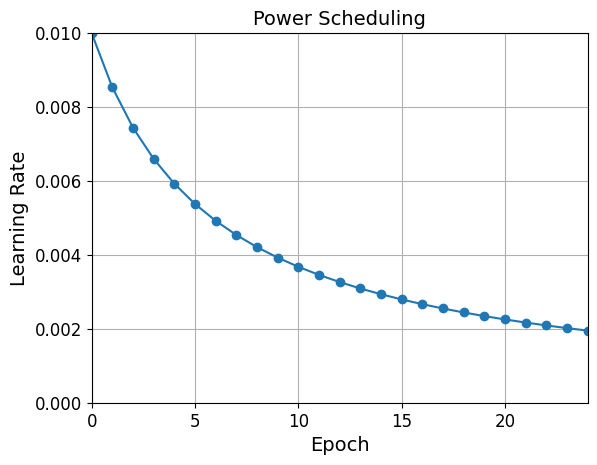

In [100]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Exponential Scheduling

In [101]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [102]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [103]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [104]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7416 - accuracy: 0.7764 - val_loss: 0.6965 - val_accuracy: 0.7698 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6504 - accuracy: 0.8033 - val_loss: 0.7058 - val_accuracy: 0.8006 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5974 - accuracy: 0.8166 - val_loss: 0.5988 - val_accuracy: 0.8180 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5407 - accuracy: 0.8324 - val_loss: 0.6002 - val_accuracy: 0.8016 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5201 - accuracy: 0.8390 - val_loss: 0.5949 - val_accuracy: 0.8438 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4569 - accuracy: 0.8570 - val_loss: 0.4656 - val_accuracy: 0.8532 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 8s

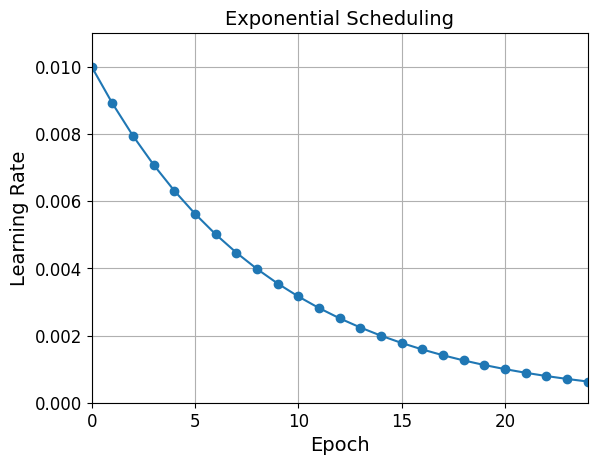

In [105]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

To update the learning rate at each iteration rather than at each epoch, you must write your own callback class:

In [106]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.learning_rate)
        K.set_value(self.model.optimizer.learning_rate, lr * 0.1**(1 / self.s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.learning_rate)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 11s 5ms/step - loss: 0.7041 - accuracy: 0.7893 - val_loss: 0.5749 - val_accuracy: 0.8340 - lr: 0.0089
Epoch 2/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6051 - accuracy: 0.8145 - val_loss: 0.5866 - val_accuracy: 0.8320 - lr: 0.0079
Epoch 3/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5496 - accuracy: 0.8313 - val_loss: 0.5480 - val_accuracy: 0.8522 - lr: 0.0071
Epoch 4/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5021 - accuracy: 0.8424 - val_loss: 0.4722 - val_accuracy: 0.8492 - lr: 0.0063
Epoch 5/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4626 - accuracy: 0.8540 - val_loss: 0.4751 - val_accuracy: 0.8578 - lr: 0.0056
Epoch 6/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4392 - accuracy: 0.8609 - val_loss: 0.4528 - val_accuracy: 0.8676 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 9

In [107]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

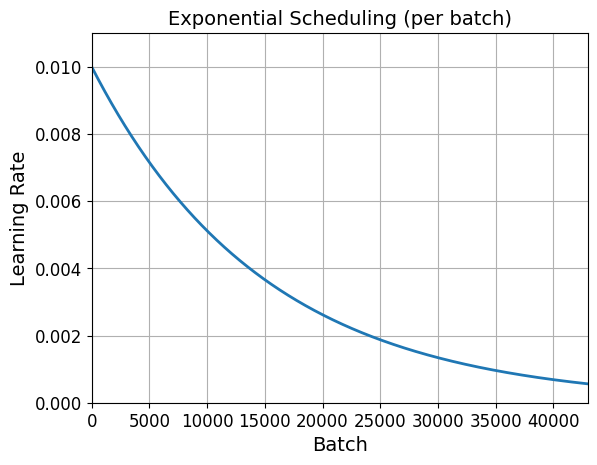

In [108]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

### PieceWise Constant Scheduling

In [109]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [110]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [111]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 9s 4ms/step - loss: 0.7466 - accuracy: 0.7772 - val_loss: 0.7223 - val_accuracy: 0.7954 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7305 - accuracy: 0.7793 - val_loss: 0.8903 - val_accuracy: 0.7572 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9428 - accuracy: 0.7141 - val_loss: 1.1009 - val_accuracy: 0.6168 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0145 - accuracy: 0.6469 - val_loss: 1.1124 - val_accuracy: 0.5796 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0938 - accuracy: 0.6119 - val_loss: 1.2004 - val_accuracy: 0.6042 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8694 - accuracy: 0.6572 - val_loss: 0.8611 - val_accuracy: 0.6614 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 7s

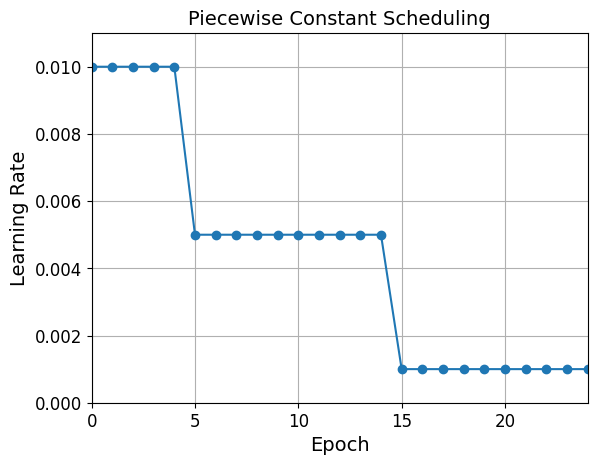

In [112]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Performance Scheduling

In [113]:
tf.random.set_seed(42)
np.random.seed(42)

In [114]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5921 - accuracy: 0.8058 - val_loss: 0.4912 - val_accuracy: 0.8492 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4969 - accuracy: 0.8394 - val_loss: 0.6333 - val_accuracy: 0.8280 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5093 - accuracy: 0.8416 - val_loss: 0.5331 - val_accuracy: 0.8502 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5210 - accuracy: 0.8449 - val_loss: 0.4513 - val_accuracy: 0.8602 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5130 - accuracy: 0.8501 - val_loss: 0.6246 - val_accuracy: 0.8370 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5263 - accuracy: 0.8503 - val_loss: 0.6854 - val_accuracy: 0.8448 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 6s

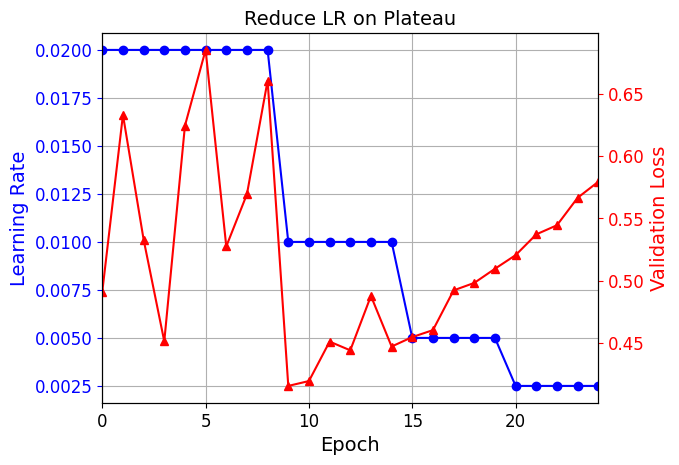

In [115]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

### tf.keras.Schedulers

In [116]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4853 - accuracy: 0.8305 - val_loss: 0.4031 - val_accuracy: 0.8614
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3767 - accuracy: 0.8665 - val_loss: 0.3709 - val_accuracy: 0.8698
Epoch 3/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3433 - accuracy: 0.8790 - val_loss: 0.3712 - val_accuracy: 0.8688
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3218 - accuracy: 0.8857 - val_loss: 0.3502 - val_accuracy: 0.8780
Epoch 5/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3065 - accuracy: 0.8924 - val_loss: 0.3428 - val_accuracy: 0.8798
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2928 - accuracy: 0.8970 - val_loss: 0.3407 - val_accuracy: 0.8800
Epoch 7/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2825 - accuracy: 0.9006 - val_loss: 0.3352 - val_accuracy:

### ICycle Scheduling

In [117]:
def build_model(seed=42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

def build_and_train_model(optimizer):
    model = build_model()
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_valid, y_valid))

In [118]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_epoch_begin(self, epoch, logs=None):
        self.sum_of_epoch_losses = 0

    def on_batch_end(self, batch, logs=None):
        mean_epoch_loss = logs["loss"]  # the epoch's mean loss so far
        new_sum_of_epoch_losses = mean_epoch_loss * (batch + 1)
        batch_loss = new_sum_of_epoch_losses - self.sum_of_epoch_losses
        self.sum_of_epoch_losses = new_sum_of_epoch_losses
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(batch_loss)
        K.set_value(self.model.optimizer.learning_rate,
                    self.model.optimizer.learning_rate * self.factor)

In [119]:
def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=1e-4,
                       max_rate=1):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = (max_rate / min_rate) ** (1 / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

In [120]:
def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses, "b")
    plt.gca().set_xscale('log')
    max_loss = losses[0] + min(losses)
    plt.hlines(min(losses), min(rates), max(rates), color="k")
    plt.axis([min(rates), max(rates), 0, max_loss])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")
    plt.grid()

In [121]:
model = build_model()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

430/430 [==============================] - 3s 4ms/step - loss: 1.8277 - accuracy: 0.3619


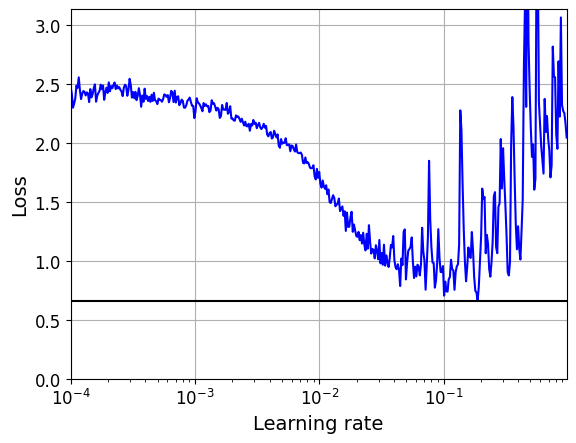

In [122]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train, y_train, epochs=1,
                                   batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [123]:
class OneCycleScheduler(tf.keras.callbacks.Callback):
    def __init__(self, iterations, max_lr=1e-3, start_lr=None,
                 last_iterations=None, last_lr=None):
        self.iterations = iterations
        self.max_lr = max_lr
        self.start_lr = start_lr or max_lr / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_lr = last_lr or self.start_lr / 1000
        self.iteration = 0

    def _interpolate(self, iter1, iter2, lr1, lr2):
        return (lr2 - lr1) * (self.iteration - iter1) / (iter2 - iter1) + lr1

    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            lr = self._interpolate(0, self.half_iteration, self.start_lr,
                                   self.max_lr)
        elif self.iteration < 2 * self.half_iteration:
            lr = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                   self.max_lr, self.start_lr)
        else:
            lr = self._interpolate(2 * self.half_iteration, self.iterations,
                                   self.start_lr, self.last_lr)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, lr)

In [124]:
model = build_model()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs,
                             max_lr=0.1)
history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 2s 4ms/step - loss: 0.9541 - accuracy: 0.6895 - val_loss: 0.6355 - val_accuracy: 0.7830
Epoch 2/25
430/430 [==============================] - 3s 7ms/step - loss: 0.5751 - accuracy: 0.7969 - val_loss: 0.4856 - val_accuracy: 0.8320
Epoch 3/25
430/430 [==============================] - 2s 4ms/step - loss: 0.4997 - accuracy: 0.8221 - val_loss: 0.4753 - val_accuracy: 0.8268
Epoch 4/25
430/430 [==============================] - 2s 4ms/step - loss: 0.4526 - accuracy: 0.8366 - val_loss: 0.4104 - val_accuracy: 0.8524
Epoch 5/25
430/430 [==============================] - 2s 4ms/step - loss: 0.4258 - accuracy: 0.8473 - val_loss: 0.4150 - val_accuracy: 0.8512
Epoch 6/25
430/430 [==============================] - 2s 4ms/step - loss: 0.3994 - accuracy: 0.8560 - val_loss: 0.3778 - val_accuracy: 0.8668
Epoch 7/25
430/430 [==============================] - 2s 4ms/step - loss: 0.3810 - accuracy: 0.8611 - val_loss: 0.3543 - val_accuracy: 0.8744
Epoch 

# Regularization

In [125]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [126]:
X_train_full = X_train_full/255.0
X_test = X_test/255.0

In [127]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [128]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

## L1 And L2 Regularization

In [129]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor of 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [130]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 8s 4ms/step - loss: 1.6267 - accuracy: 0.8132 - val_loss: 0.7042 - val_accuracy: 0.8384
Epoch 2/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7189 - accuracy: 0.8278 - val_loss: 0.6945 - val_accuracy: 0.8344


In [131]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 8s 4ms/step - loss: 1.6541 - accuracy: 0.8127 - val_loss: 0.7064 - val_accuracy: 0.8388
Epoch 2/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7199 - accuracy: 0.8281 - val_loss: 0.6945 - val_accuracy: 0.8342


## Dropout

In [132]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5739 - accuracy: 0.8027 - val_loss: 0.3676 - val_accuracy: 0.8708
Epoch 2/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4231 - accuracy: 0.8457 - val_loss: 0.3324 - val_accuracy: 0.8770


## Alpha Dropout

In [133]:
tf.random.set_seed(42)
np.random.seed(42)

In [134]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6616 - accuracy: 0.7595 - val_loss: 0.5958 - val_accuracy: 0.8396
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5613 - accuracy: 0.7938 - val_loss: 0.5580 - val_accuracy: 0.8392
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5287 - accuracy: 0.8039 - val_loss: 0.5339 - val_accuracy: 0.8478
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5074 - accuracy: 0.8121 - val_loss: 0.4603 - val_accuracy: 0.8648
Epoch 5/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4940 - accuracy: 0.8176 - val_loss: 0.4318 - val_accuracy: 0.8636
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4830 - accuracy: 0.8197 - val_loss: 0.4826 - val_accuracy: 0.8574
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4742 - accuracy: 0.8228 - val_loss: 0.4887 - val_accuracy:

In [135]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4558 - accuracy: 0.8623


[0.455792635679245, 0.8622999787330627]

In [136]:
model.evaluate(X_train_scaled, y_train)

1719/1719 [==============================] - 5s 3ms/step - loss: 0.3389 - accuracy: 0.8842


[0.3388864994049072, 0.884181797504425]

In [137]:
history = model.fit(X_train_scaled, y_train)

1719/1719 [==============================] - 6s 3ms/step - loss: 0.4207 - accuracy: 0.8443


## MC Dropout

In [138]:
tf.random.set_seed(42)
np.random.seed(42)

In [139]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [140]:
np.round(model.predict(X_test_scaled[:1]), 2)

1/1 [==============================] - 0s 55ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],
      dtype=float32)

In [141]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.39, 0.  , 0.19, 0.  , 0.43]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.96]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.18, 0.  , 0.77]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.33, 0.  , 0.66]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.24, 0.  , 0.69]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.26, 0.  , 0.73]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.03, 0.  , 0.95]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.45, 0.  , 0.53]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.04, 0.  , 0

In [142]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.21, 0.  , 0.74]],
      dtype=float32)

In [143]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.21, 0.01, 0.24]],
      dtype=float32)

In [144]:
y_pred = np.argmax(y_proba, axis=1)

In [145]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8684

In [146]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [147]:
tf.random.set_seed(42)
np.random.seed(42)

In [148]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [149]:
mc_model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 784)               0         
                                                                 
 mc_alpha_dropout_3 (MCAlpha  (None, 784)              0         
 Dropout)                                                        
                                                                 
 dense_281 (Dense)           (None, 300)               235500    
                                                                 
 mc_alpha_dropout_4 (MCAlpha  (None, 300)              0         
 Dropout)                                                        
                                                                 
 dense_282 (Dense)           (None, 100)               30100     
                                                                 
 mc_alpha_dropout_5 (MCAlpha  (None, 100)            

In [150]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [151]:
mc_model.set_weights(model.get_weights())

Model with mc dropout

In [152]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

1/1 [==============================] - 0s 18ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.2 , 0.  , 0.73]],
      dtype=float32)

## MaxNorm

In [153]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [154]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 4ms/step - loss: 0.4758 - accuracy: 0.8337 - val_loss: 0.3792 - val_accuracy: 0.8632
Epoch 2/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3609 - accuracy: 0.8688 - val_loss: 0.3915 - val_accuracy: 0.8632
